In [1]:
from Acquisition_config import ACQUISITION_CONFIG
import sys
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Synth')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Exceptions')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\DAQ')
import Synthesizer
from logs.logging_config import LOGGING_CONFIG
from logging.config import dictConfig
import logging
import json
from Exceptions import replace_non_serializable
import DAQ
import niscope as ni
import numpy as np

In [2]:
filepath = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API'

In [3]:
dictConfig(LOGGING_CONFIG)
logger = logging.getLogger(__name__)
logger.info('START EXECUTION')

18:08:04.095 - __main__ - <module> - INFO - START EXECUTION


In [4]:
try:
    cfg1 = json.dumps(replace_non_serializable(ACQUISITION_CONFIG))
    logger.info('Dumping acquisition configuration')
    with open(ACQUISITION_CONFIG['acq_conf']['path'] + 'config.json','w') as f:
        f.write(cfg1)
except Exception:
    logger.critical('Dumping acquisition configuration')
    raise SystemError("Could not dump acquisition configuration!")

18:08:04.342 - __main__ - <module> - INFO - Dumping acquisition configuration


In [5]:
res = [5.3465, 5.5757, 5.6748, 5.98126]
sgen_board = ''
amplitude = 0
f = 0

In [6]:
try:
    daq = DAQ.DAQ()
    logger.info('DAQ class object correctly created')
except Exception:
    logger.critical('Could not crate DAQ class object')
    raise SyntaxError('Could not create DAQ class object')

18:08:05.096 - __main__ - <module> - INFO - DAQ class object correctly created


In [7]:
try:
    s1 = Synthesizer.Synthesizer(1)
    s2 = Synthesizer.Synthesizer(2)
    s1.connettore()
    s2.connettore()
    logger.info('Synth class object correctly created and connected!')
except Exception:
    logger.critical('Could not crate synth class object')
    raise SyntaxError('Could not create synth class object')

Synth_uno!
Synth_due!
Si è connessi al synth_uno!
Si è connessi al synth_due!
18:08:12.133 - __main__ - <module> - INFO - Synth class object correctly created and connected!


In [8]:
channels = {'I'			: 0, 
            'Q'			: 1,
            'trigger'	: 3}

In [9]:
daq.session = 'PXI1Slot4'

In [10]:
try:
    daq.reset_with_def()
    daq.get_status
    logger.info('Resetting DAQ with defaults')
except Exception:
    logger.error('Could not reset DAQ with defaults')
    pass

18:08:13.027 - __main__ - <module> - INFO - Resetting DAQ with defaults


In [11]:
try:
    daq.acq_conf = ACQUISITION_CONFIG['acq_conf']
    logger.info('Inserting acquisition configuration from ACQUISITION_CONFIG dictionary')
except Exception:
    logger.warning('Coulkd not insert acquisition configuration')
    raise SystemError('Coulkd not insert acquisition configuration')

18:08:13.111 - __main__ - <module> - INFO - Inserting acquisition configuration from ACQUISITION_CONFIG dictionary


In [12]:
try:
    daq.horizontal_conf = ACQUISITION_CONFIG['horizontal']
    logger.info('Inserting hconf dic')
except Exception:
    logger.warning('Could not insert hconf dic')
    raise SystemError('Could not insert hconf dic')

18:08:13.612 - __main__ - <module> - INFO - Inserting hconf dic


In [13]:
try:
    daq.vertical_conf = ACQUISITION_CONFIG['vertical']
    logger.info('Inserting vconf dic')
except Exception:
    logger.warning('Could not insert vconf dic')
    raise SystemError('Could not insert vconf dic')

18:08:14.079 - __main__ - <module> - INFO - Inserting vconf dic


In [14]:
try:
    daq.chan_conf = ACQUISITION_CONFIG['chan_conf']
    logger.info('Inserting chan char dic')
except Exception:
    logger.warning('Could not insert chan char dic')
    raise SystemError('Could not insert chan char dic')

18:08:14.455 - __main__ - <module> - INFO - Inserting chan char dic


In [15]:
try:
    daq.trigger_dic = ACQUISITION_CONFIG['trigger']
    logger.info('Inserting trigger dic')
except Exception:
    logger.warning('Could not insert trigger dic')
    raise SystemError('Could not insert trigger dic')

18:08:14.761 - __main__ - <module> - INFO - Inserting trigger dic


In [16]:
try:
    daq._session = ni.Session('PXI1Slot4')
    logger.info('Creating new session!!!')
except Exception:
    logger.critical('Could not create new Niscope sesison')
    raise SystemError('Could not create new Niscope session')

18:08:15.275 - __main__ - <module> - INFO - Creating new session!!!


In [17]:
try:
    if daq._session is not None:
        daq.config_trigger()
        logger.info('implementing trigger')
    else:
        pass
except Exception:
    logger.warning('Could not implement trigger')
    raise SystemError('Could not implement trigger')

18:08:15.732 - __main__ - <module> - INFO - implementing trigger


In [18]:
LO = '1GHz'
RF = '1.00000001 GHz'
s1.set_frequency(LO)
s2.set_frequency(RF)
s1.outp_frequency_on()
s2.outp_frequency_on()


In [19]:
with daq._session as session:
    logger.info('Configuring channels')
    daq.configure_channels()
    data = {'CH0': [],
            'CH1': [],
            'CH2': [],
            'CH3': []}
    wf_info = []
    try:
        daq._session.initiate()
        logger.info('Session initiated')
    except Exception:
        logger.critical('Could not initiate session')


    try:
        logger.info('Initiating fetching...')
        waveforms = session.channels[0, 1].fetch()
        logger.info('Converting wfm[0] into dictionary')
    except Exception:
        logger.error('Could not fetch!!')
        sys.exit()

18:08:16.280 - __main__ - <module> - INFO - Configuring channels
18:08:16.299 - __main__ - <module> - INFO - Session initiated
18:08:16.300 - __main__ - <module> - INFO - Initiating fetching...
18:08:16.308 - __main__ - <module> - INFO - Converting wfm[0] into dictionary


In [20]:
print(waveforms[::2][0])

Channel             : 0
Record              : 0
Absolute X0         : 5,314.15
Relative X0         : 3.00781e-09
dt                  : 4e-09
Offset              : 0
Gain                : 1
Waveform Length     : 10,000



In [21]:
for r in range(ACQUISITION_CONFIG['acq_conf']['num_records']):
    data['CH1'].append(waveforms[0::2][r].samples.tolist())
    data['CH0'].append(waveforms[1::2][r].samples.tolist())
data['time'] = np.arange(0,len(data['CH0'][0]),1)

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Noise')

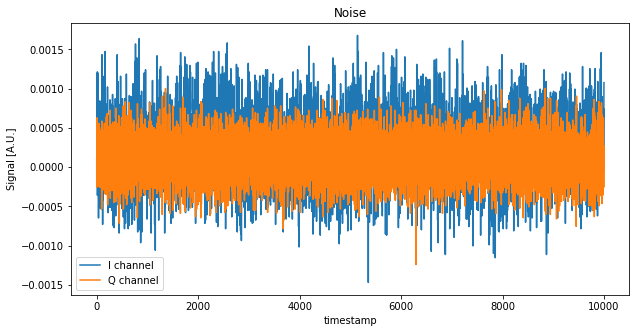

In [24]:
plt.figure(figsize=(10,5))
plt.plot(data['time'],data['CH1'][0], label='I channel')
plt.plot(data['time'],data['CH0'][0], label='Q channel')
plt.xlabel('timestamp')
plt.ylabel('Signal [A.U.]')
plt.legend()
plt.title('Noise')